<center><h1 style='color:#CDB4DB'>Caffeine Content of Drinks</h1></center>


<center><img src='bannerImg.jpg' width="900" height="600"></center>

## Caffeine amounts and calories of most drink brands and types.
**Information**
List of drinks that generally contains caffeine. Some instances are not drinks exactly. Ground coffee or tea leafs would produce that amount of Volume (ml) if prepared according to the provider. They don't have calories since you can control the sugar level.

**Dataset retrieved from:** https://www.kaggle.com/datasets/heitornunes/caffeine-content-of-drinks?resource=download
**Original source:** https://www.caffeineinformer.com/the-caffeine-database

## Imports

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Extraction and initial analysis of the dataframe

In [161]:
caffeine_df = pd.read_csv('caffeine.csv')
caffeine_df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [162]:
caffeine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [163]:
caffeine_df.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [164]:
caffeine_df['type'].unique()

array(['Coffee', 'Energy Drinks', 'Energy Shots', 'Soft Drinks', 'Tea',
       'Water'], dtype=object)

## Columnn for caffeine concentration

In [165]:
caffeine_df['caffeine_concentration'] = caffeine_df['Caffeine (mg)'] / caffeine_df['Volume (ml)']

## Color palette to use in visualizations

In [166]:
type_palette = {
    'Coffee': '#CDB4DB',
    'Energy Drinks': '#FFC8DD',
    'Energy Shots': '#FFAFCC',
    'Soft Drinks': '#BDE0FE',
    'Tea': '#D8E2DC',
    'Water': '#9D8189'
}

## Frecuency of beverage types

[Text(0.5, 1.0, 'Frecuency of beverage product types')]

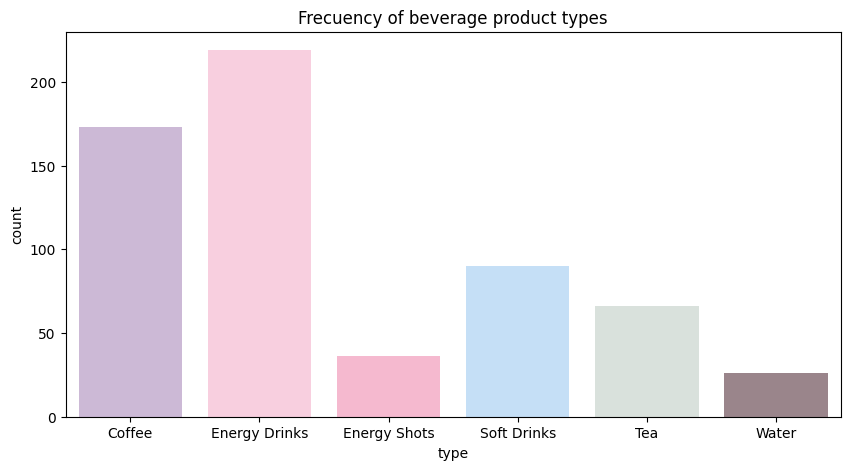

In [167]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=caffeine_df, palette=type_palette).set(title='Frecuency of beverage product types')

## Caffeine (mg) vs Volume (ml)
Graph created so we can see the volume and caffeine content of each type of beverage.

<Figure size 1500x800 with 0 Axes>

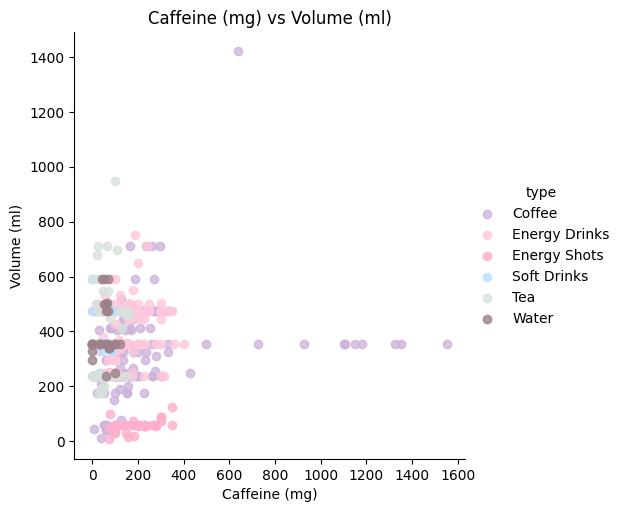

In [168]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Caffeine (mg)', y='Volume (ml)', data=caffeine_df, fit_reg=False, hue='type', palette=type_palette).set(title='Caffeine (mg) vs Volume (ml)')

## Caffeine (mg) vs Calories (cal)
Graph created so we can see the calorie and caffeine content of each type of beverage.

<Figure size 1500x800 with 0 Axes>

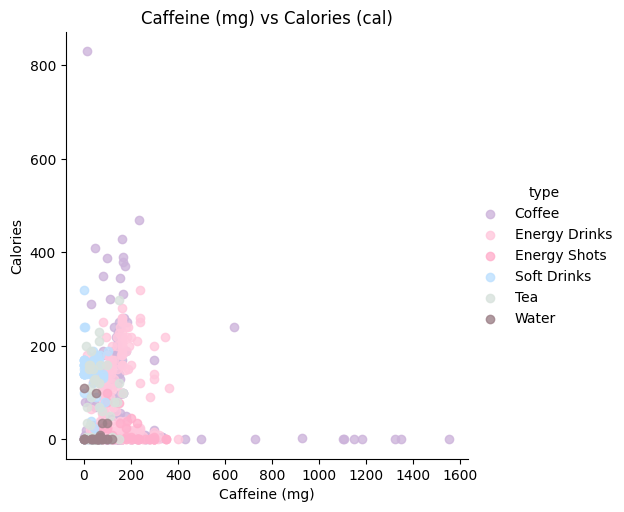

In [169]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Caffeine (mg)', y='Calories', data=caffeine_df, fit_reg=False, hue='type', palette=type_palette).set(title='Caffeine (mg) vs Calories (cal)')

## Calories (cal) vs Caffeine concentration
Graph created so we can see the calorie and caffeine content of each type of beverage.

<Figure size 1500x800 with 0 Axes>

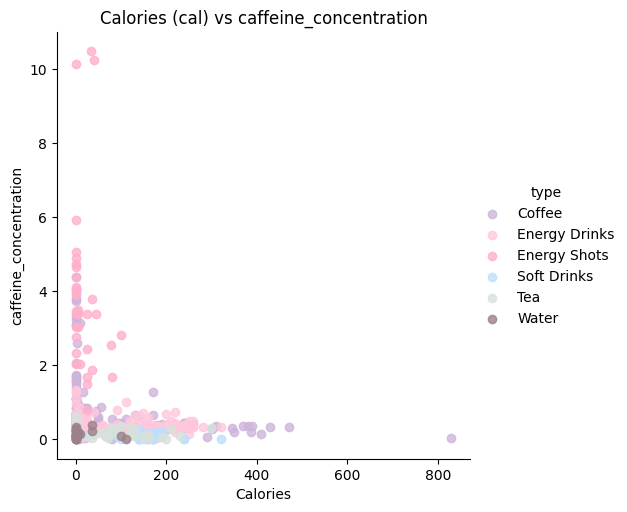

In [170]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Calories', y='caffeine_concentration', data=caffeine_df, fit_reg=False, hue='type', palette=type_palette).set(title='Calories (cal) vs caffeine_concentration')

### Top 10 beverages with highest caffeine content

In [171]:
highest_content = caffeine_df.sort_values(by='Caffeine (mg)', ascending=False).head(10)

[Text(0.5, 1.0, 'Top 10 beverages with high caffeine content')]

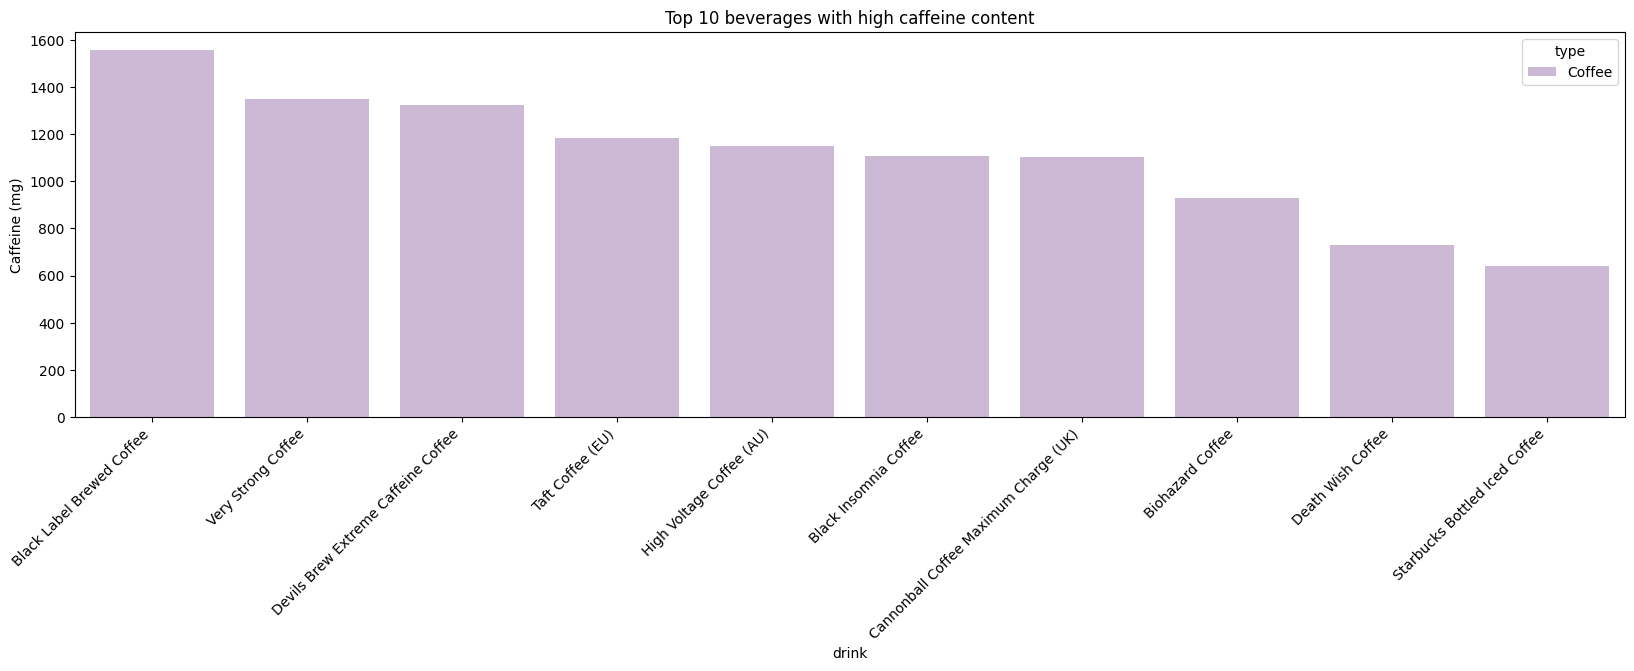

In [172]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha='right')
sns.barplot(x='drink', y='Caffeine (mg)', data=highest_content, hue='type', palette=type_palette).set(title='Top 10 beverages with high caffeine content')

### Top 10 beverages with highest calorie content


[Text(0.5, 1.0, 'Top 10 beverages with high calorie content')]

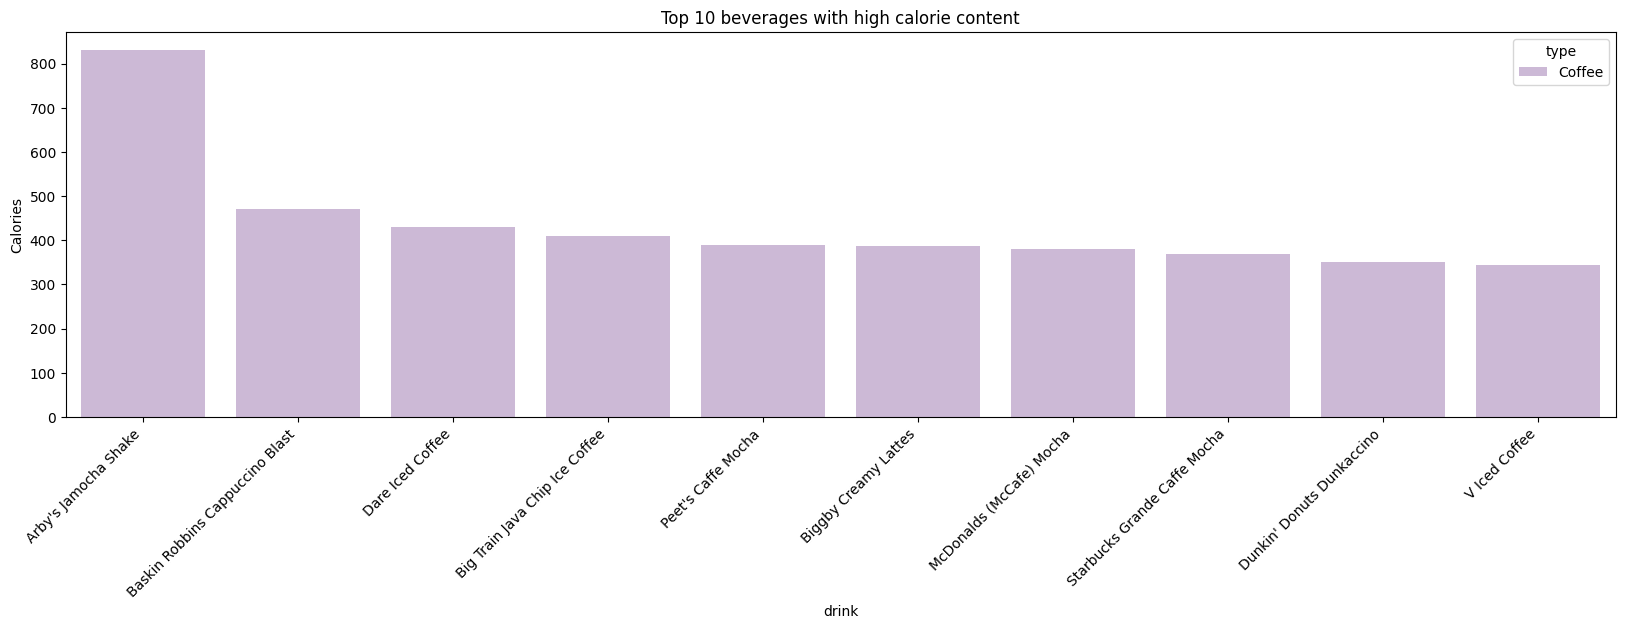

In [173]:
highest_calories = caffeine_df.sort_values(by='Calories', ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha='right')
sns.barplot(x='drink', y='Calories', data=highest_calories, hue='type', palette=type_palette).set(title='Top 10 beverages with high calorie content')

### Top 10 beverages with highest caffeine concentration


[Text(0.5, 1.0, 'Top 10 beverages with highest caffeine concentration')]

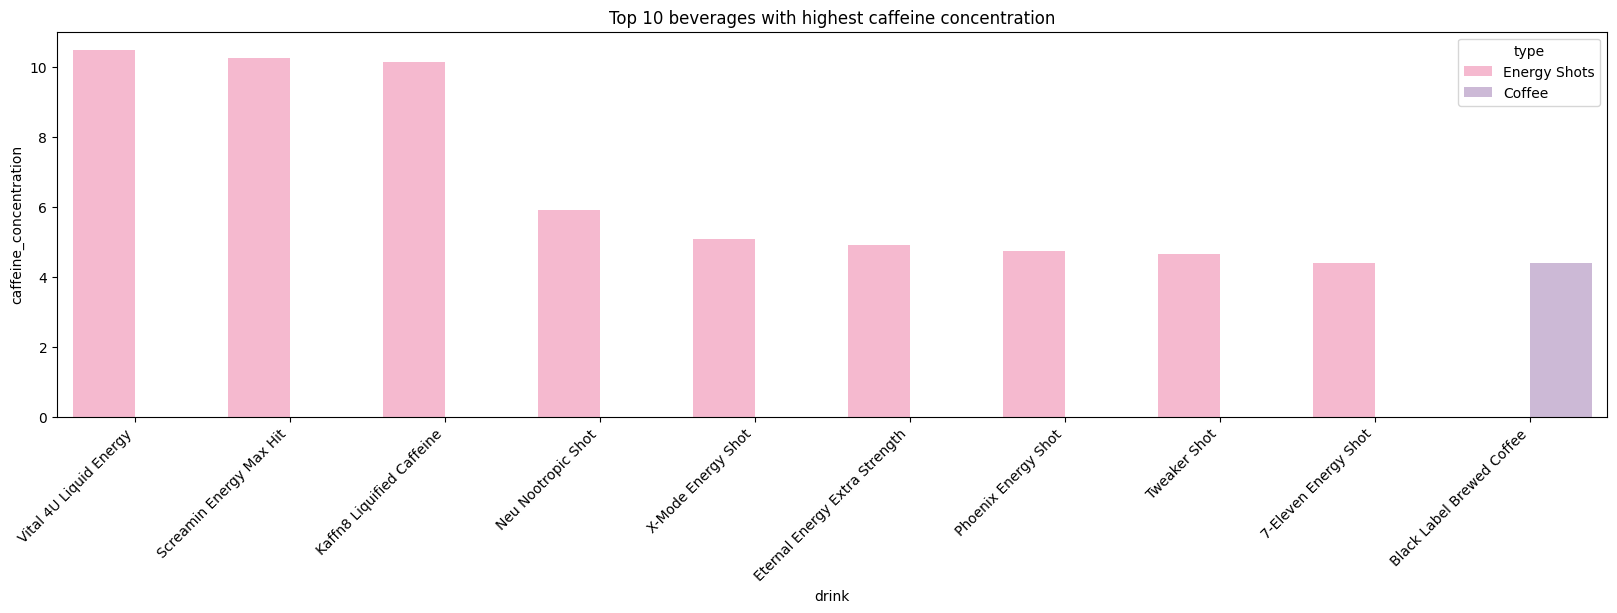

In [174]:
highest_concentration = caffeine_df.sort_values(by='caffeine_concentration', ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha='right')
sns.barplot(x='drink', y='caffeine_concentration', data=highest_concentration, hue='type', palette=type_palette).set(title='Top 10 beverages with highest caffeine concentration')